In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Data Loading and Exploration

# Load the dataset
data_path = '/Users/jahnavirampolisetti/Downloads/obesity_level.csv'
obesity_data = pd.read_csv(data_path)

# Rename and correct labels as necessary
obesity_data.rename(columns={'0be1dad': 'Obesity_Level'}, inplace=True)
obesity_data['Obesity_Level'] = obesity_data['Obesity_Level'].replace({'0rmal_Weight': 'Normal_Weight'})

# Drop unnecessary 'id' column
obesity_data.drop(columns=['id'], inplace=True)

# Convert binary indicators from integer to boolean
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
obesity_data[binary_columns] = obesity_data[binary_columns].astype(bool)

# Check for missing values
missing_values = obesity_data.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values)




Missing values in the dataset:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Obesity_Level                     0
dtype: int64


In [2]:
# Handling Categorical Variables: Convert them into one-hot encoding for machine learning
categorical_columns = ['CAEC', 'CALC', 'MTRANS']
obesity_data = pd.get_dummies(obesity_data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the dataset
print("First few rows of the updated dataset:")
print(obesity_data.head())



First few rows of the updated dataset:
   Gender        Age    Height      Weight  family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            True   
1  Female  18.000000  1.560000   57.000000                            True   
2  Female  18.000000  1.711460   50.165754                            True   
3  Female  20.952737  1.710730  131.274851                            True   
4    Male  31.641081  1.914186   93.798055                            True   

   FAVC      FCVC       NCP  SMOKE      CH2O  ...        Obesity_Level  \
0  True  2.000000  2.983297  False  2.763573  ...  Overweight_Level_II   
1  True  2.000000  3.000000  False  2.000000  ...        Normal_Weight   
2  True  1.880534  1.411685  False  1.910378  ...  Insufficient_Weight   
3  True  3.000000  3.000000  False  1.674061  ...     Obesity_Type_III   
4  True  2.679664  1.971472  False  1.979848  ...  Overweight_Level_II   

   CAEC_Always  CAEC_Frequently CAEC_Sometimes 

In [3]:
# Display basic information about the dataset
print("\nDataset Information after preprocessing:")
obesity_data.info()

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics for numerical columns:")
print(obesity_data.describe())




Dataset Information after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  bool   
 5   FAVC                            20758 non-null  bool   
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   SMOKE                           20758 non-null  bool   
 9   CH2O                            20758 non-null  float64
 10  SCC                             20758 non-null  bool   
 11  FAF                             20758 non-null  flo

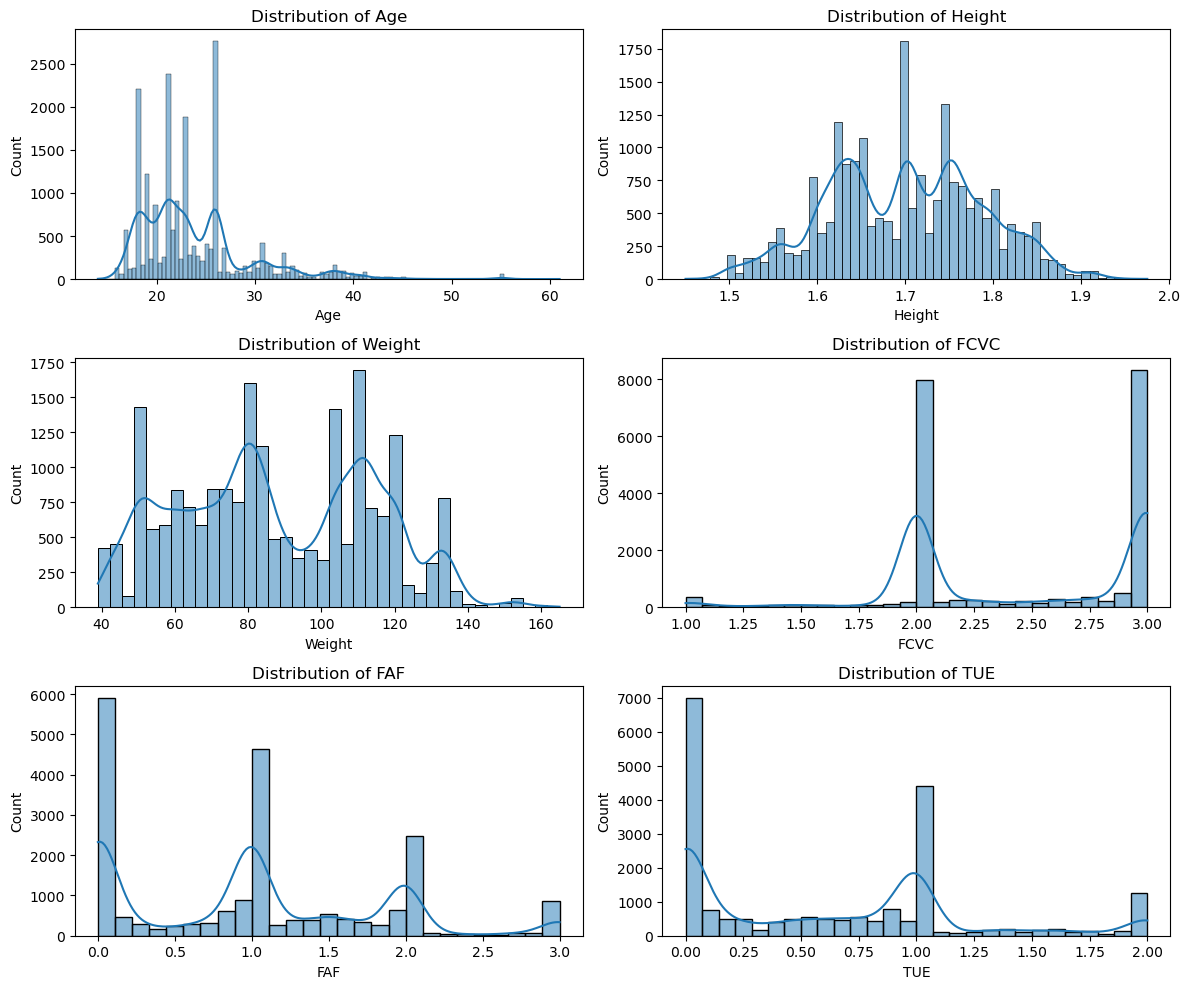

In [4]:
# Optimized plotting of distributions for numerical variables
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'FAF', 'TUE']
fig, axes = plt.subplots(nrows=(len(numeric_cols) + 1) // 2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=obesity_data, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any unused axes if the number of numeric columns is odd
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



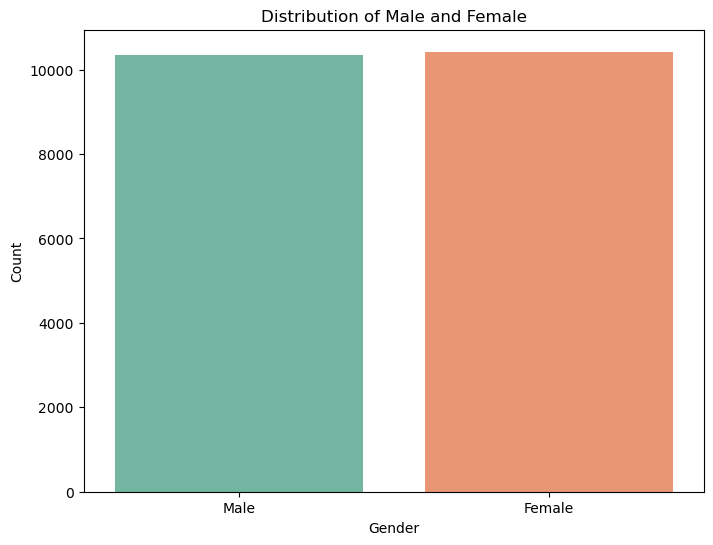

In [5]:
# Distribution of Gender with countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=obesity_data, palette='Set2')
plt.title('Distribution of Male and Female')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()




Distribution of Obesity Level:
Obesity_Level
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


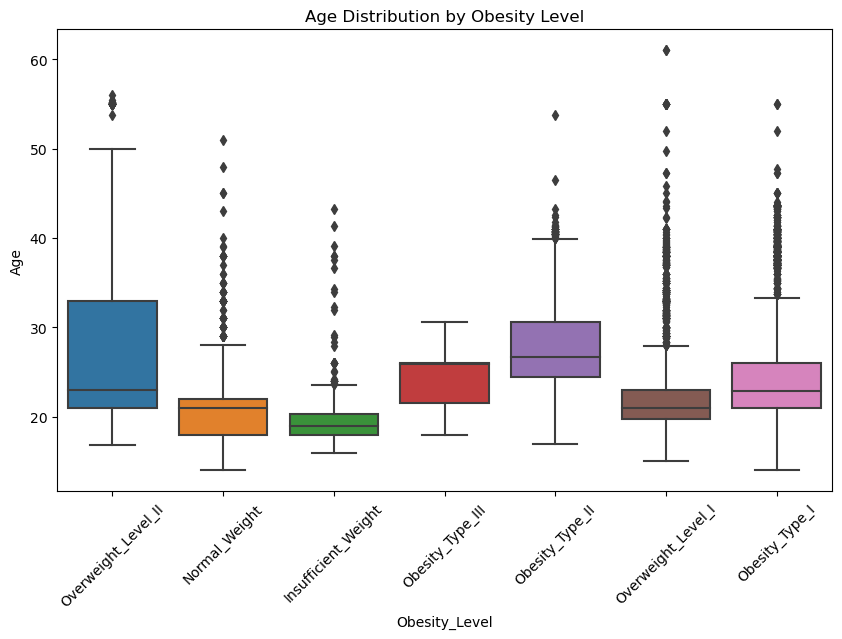

In [6]:
# Distribution of Obesity Level
print("\nDistribution of Obesity Level:")
print(obesity_data['Obesity_Level'].value_counts())

# Boxplot to visualize Age vs. Obesity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_Level', y='Age', data=obesity_data)
plt.xticks(rotation=45)
plt.title('Age Distribution by Obesity Level')
plt.show()



In [7]:
# Final dataset check
print("\nUpdated dataset columns:")
print(obesity_data.columns)



Updated dataset columns:
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'Obesity_Level', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes',
       'CALC_Frequently', 'CALC_Sometimes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')


In [8]:
# Task 2: Data Preprocessing and Feature Engineering

# Check for missing values
print("\nChecking for missing values:")
print(obesity_data.isnull().sum())

# Identify and remove invalid entries (Height <= 0 or Weight <= 0)
invalid_entries = obesity_data[(obesity_data['Height'] <= 0) | (obesity_data['Weight'] <= 0)]
print("\nInvalid entries (Height <= 0 or Weight <= 0):")
print(invalid_entries)

# Remove invalid entries from the dataset
obesity_data_cleaned = obesity_data[~((obesity_data['Height'] <= 0) | (obesity_data['Weight'] <= 0))]

# Feature engineering: Adding a new column for BMI calculation
obesity_data_cleaned['BMI'] = obesity_data_cleaned['Weight'] / (obesity_data_cleaned['Height'] ** 2)

# Check for unrealistic BMI values (e.g., outside the typical range of 10 to 60)
invalid_bmi = obesity_data_cleaned[(obesity_data_cleaned['BMI'] < 10) | (obesity_data_cleaned['BMI'] > 60)]
print("\nUnrealistic BMI values (BMI < 10 or BMI > 60):")
print(invalid_bmi)

# Optionally remove unrealistic BMI entries
obesity_data_cleaned = obesity_data_cleaned[~((obesity_data_cleaned['BMI'] < 10) | (obesity_data_cleaned['BMI'] > 60))]

# Summary statistics for BMI
mean_bmi = obesity_data_cleaned['BMI'].mean()
median_bmi = obesity_data_cleaned['BMI'].median()
std_bmi = obesity_data_cleaned['BMI'].std()

print(f"\nMean BMI: {mean_bmi}, Median BMI: {median_bmi}, Standard Deviation BMI: {std_bmi}")





Checking for missing values:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
Obesity_Level                     0
CAEC_Always                       0
CAEC_Frequently                   0
CAEC_Sometimes                    0
CALC_Frequently                   0
CALC_Sometimes                    0
MTRANS_Bike                       0
MTRANS_Motorbike                  0
MTRANS_Public_Transportation      0
MTRANS_Walking                    0
dtype: int64

Invalid entries (Height <= 0 or Weight <= 0):
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overwei

In [9]:
# Display the cleaned data
print("\nCleaned Data Sample:")
print(obesity_data_cleaned.head())


Cleaned Data Sample:
   Gender        Age    Height      Weight  family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            True   
1  Female  18.000000  1.560000   57.000000                            True   
2  Female  18.000000  1.711460   50.165754                            True   
3  Female  20.952737  1.710730  131.274851                            True   
4    Male  31.641081  1.914186   93.798055                            True   

   FAVC      FCVC       NCP  SMOKE      CH2O  ...  CAEC_Always  \
0  True  2.000000  2.983297  False  2.763573  ...        False   
1  True  2.000000  3.000000  False  2.000000  ...        False   
2  True  1.880534  1.411685  False  1.910378  ...        False   
3  True  3.000000  3.000000  False  1.674061  ...        False   
4  True  2.679664  1.971472  False  1.979848  ...        False   

   CAEC_Frequently  CAEC_Sometimes CALC_Frequently  CALC_Sometimes  \
0            False            True        


Correlation Matrix:
             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.011713  0.283381  0.034414 -0.048479 -0.016325 -0.192259   
Height -0.011713  1.000000  0.416677 -0.071546  0.191383  0.183706  0.295278   
Weight  0.283381  0.416677  1.000000  0.245682  0.095947  0.317914 -0.084845   
FCVC    0.034414 -0.071546  0.245682  1.000000  0.113349  0.101299 -0.089822   
NCP    -0.048479  0.191383  0.095947  0.113349  1.000000  0.080949  0.100871   
CH2O   -0.016325  0.183706  0.317914  0.101299  0.080949  1.000000  0.082932   
FAF    -0.192259  0.295278 -0.084845 -0.089822  0.100871  0.082932  1.000000   
TUE    -0.296154  0.076433 -0.086471 -0.147843  0.067459 -0.010654  0.021213   
BMI     0.320842  0.098126  0.941071  0.296933  0.048736  0.292142 -0.210239   

             TUE       BMI  
Age    -0.296154  0.320842  
Height  0.076433  0.098126  
Weight -0.086471  0.941071  
FCVC   -0.147843  0.296933  
NCP     0.067459  0.048736  
CH2O

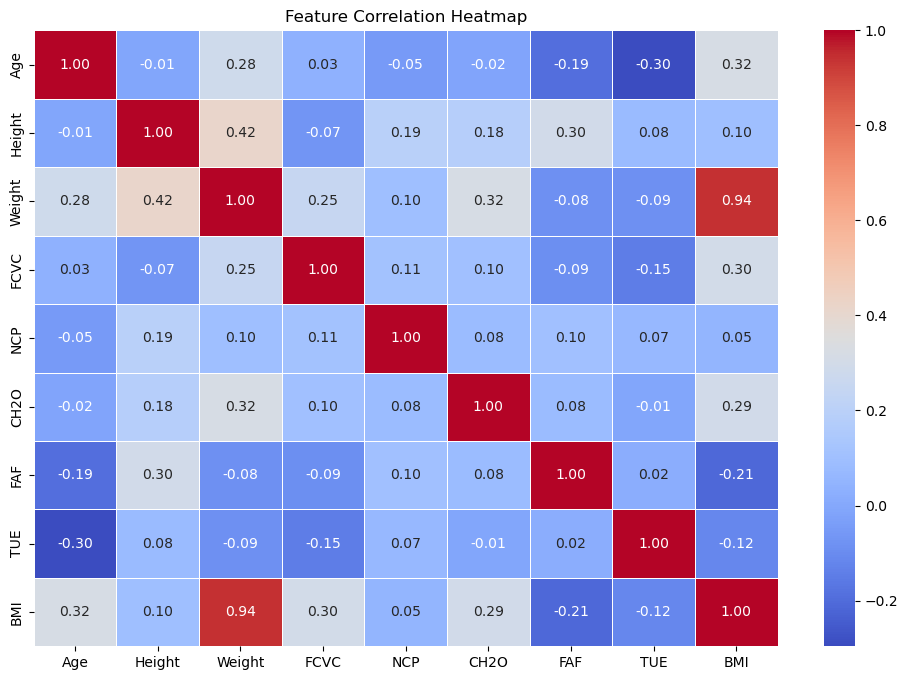

In [10]:
import numpy as np
# Select only numerical columns for correlation
numeric_columns = obesity_data_cleaned.select_dtypes(include=[np.number]).columns
corr_matrix = obesity_data_cleaned[numeric_columns].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


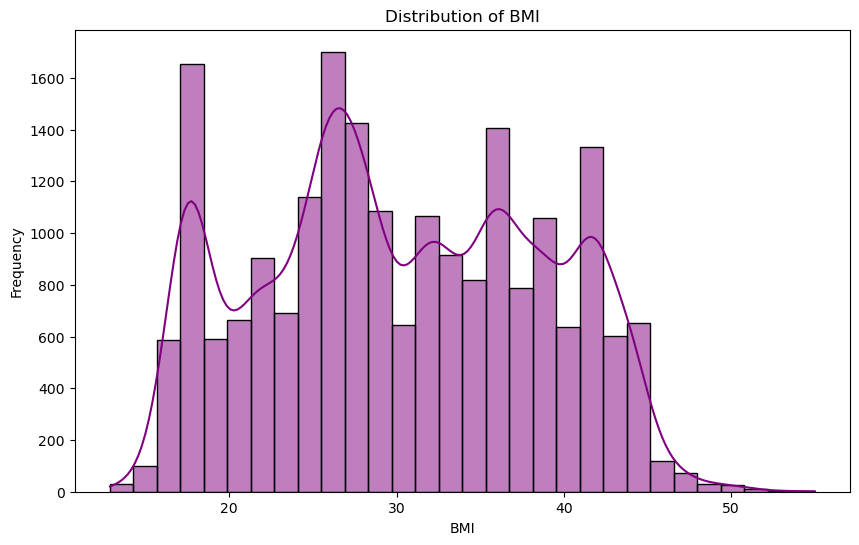

In [11]:
# Task 3: Data Analysis and Visualization

# Visualizing the distribution of the BMI values
plt.figure(figsize=(10, 6))
sns.histplot(data=obesity_data_cleaned, x='BMI', bins=30, kde=True, color='purple')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()



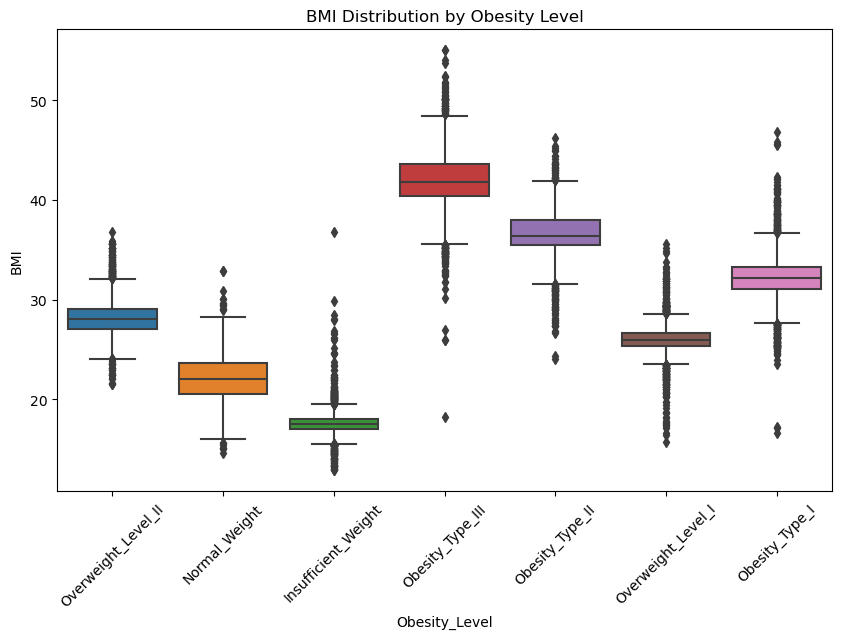

In [12]:
# Boxplot to visualize BMI by Obesity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_Level', y='BMI', data=obesity_data_cleaned)
plt.xticks(rotation=45)
plt.title('BMI Distribution by Obesity Level')
plt.show()




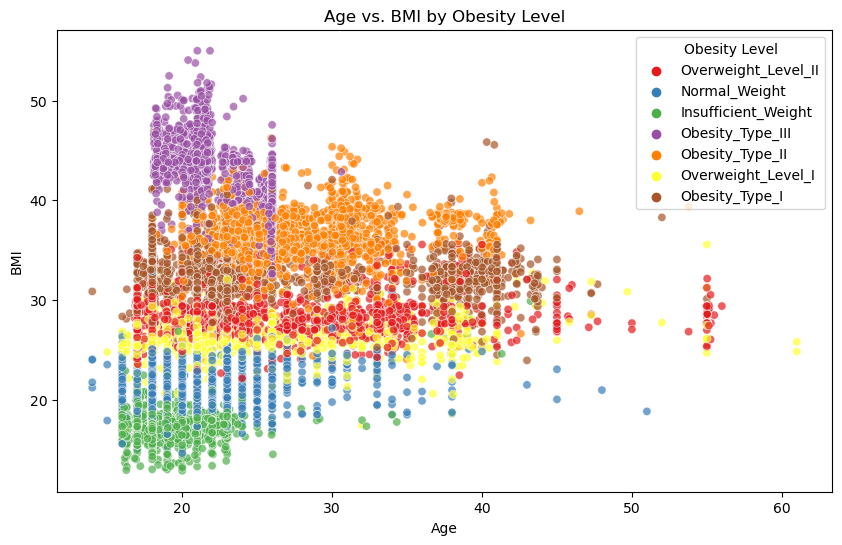


Mean Age and BMI by Obesity Level:
                           Age        BMI
Obesity_Level                            
Insufficient_Weight  19.336502  17.583619
Normal_Weight        20.801388  22.000999
Obesity_Type_I       25.023615  32.154649
Obesity_Type_II      27.707128  36.521958
Obesity_Type_III     24.126847  41.781745
Overweight_Level_I   23.045197  26.059270
Overweight_Level_II  26.032084  28.192491


In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(10, 6))

# Scatter plot with transparency (alpha) to reduce overlap and jitter for better distinction
sns.scatterplot(data=obesity_data_cleaned, x='Age', y='BMI', hue='Obesity_Level', 
                palette='Set1', alpha=0.7)

# Set plot title and labels
plt.title('Age vs. BMI by Obesity Level')
plt.xlabel('Age')
plt.ylabel('BMI')

# Display the legend
plt.legend(title='Obesity Level')

# Show the plot
plt.show()

# Grouping by Obesity Level to find the mean Age and BMI
grouped_data = obesity_data_cleaned.groupby('Obesity_Level')[['Age', 'BMI']].mean()

# Display the grouped data
print("\nMean Age and BMI by Obesity Level:")
print(grouped_data)



In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Separate features and target variable
X = obesity_data_cleaned.drop(columns=['Obesity_Level'])  # Features
y = obesity_data_cleaned['Obesity_Level']  # Target

# Step 2: Apply one-hot encoding for categorical variables
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns  # Identify categorical columns

# Step 3: Use OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encoding, drop first to avoid multicollinearity
    ],
    remainder='passthrough'  # Keep the rest of the numeric columns as is
)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build pipeline for pre-processing and model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply one-hot encoding
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest model
])

# Step 6: Train the model
rf_pipeline.fit(X_train, y_train)

# Step 7: Get feature importances from the trained model
rf_model = rf_pipeline.named_steps['classifier']
onehot_encoded_cols = rf_pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_feature_names = list(onehot_encoded_cols) + list(X.select_dtypes(include=['float64', 'int64']).columns)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': rf_model.feature_importances_
})

# Sort feature importances
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Step 8: Display feature importances
print("\nFeature Importances:")
print(feature_importances)




Feature Importances:
                                Feature  Importance
22                                  BMI    0.292776
16                               Weight    0.236929
14                                  Age    0.081108
15                               Height    0.065989
17                                 FCVC    0.065228
0                           Gender_Male    0.048043
19                                 CH2O    0.033819
21                                  TUE    0.030819
20                                  FAF    0.029249
18                                  NCP    0.025485
1   family_history_with_overweight_True    0.021956
9                   CALC_Sometimes_True    0.017731
7                   CAEC_Sometimes_True    0.010216
6                  CAEC_Frequently_True    0.010133
2                             FAVC_True    0.009245
12    MTRANS_Public_Transportation_True    0.008601
4                              SCC_True    0.003739
8                  CALC_Frequently_True   

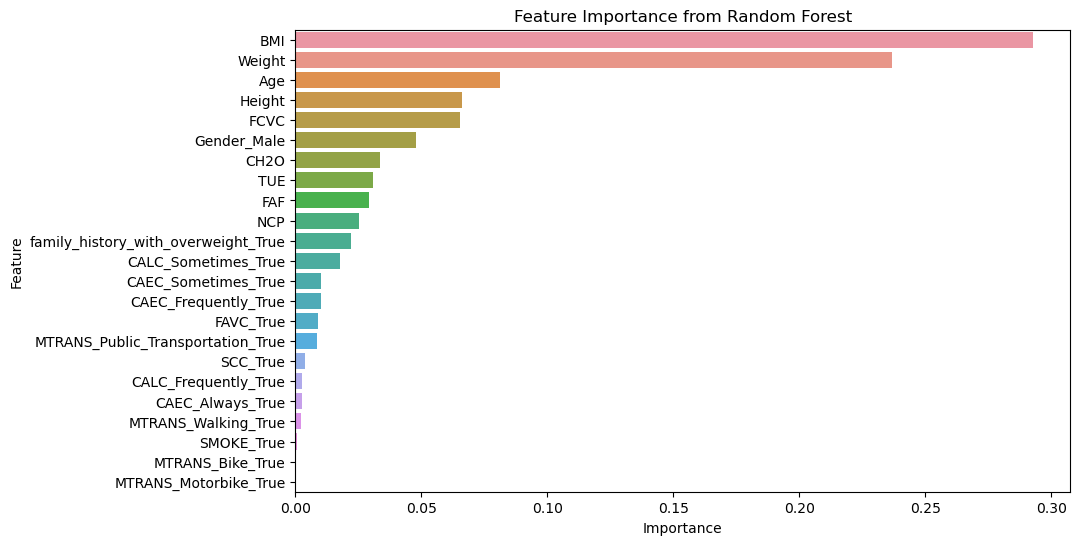

In [15]:
# Step 9: Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.show()



In [16]:
from sklearn.metrics import classification_report

# Step 10: Model evaluation (accuracy on test data)
accuracy = rf_pipeline.score(X_test, y_test)
print(f"\nModel Accuracy on Test Data: {accuracy:.2f}")

# Step 11: Generate predictions on test data
y_pred = rf_pipeline.predict(X_test)

# Step 12: Classification report
report = classification_report(y_test, y_pred, target_names=rf_pipeline.classes_)
print("\nClassification Report:")
print(report)



Model Accuracy on Test Data: 0.90

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.93      0.94       524
      Normal_Weight       0.87      0.88      0.87       626
     Obesity_Type_I       0.88      0.87      0.87       543
    Obesity_Type_II       0.97      0.98      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.76      0.77      0.76       484
Overweight_Level_II       0.79      0.78      0.79       514

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Apply One-Hot Encoding for categorical features
# Ensure all categorical variables are one-hot encoded
X = pd.get_dummies(X, drop_first=True)

# Step 2: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Step 3: Train-test split on balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Step 4: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the model and get classification report
y_pred = rf_model.predict(X_test)
print("\nModel Accuracy on Test Data:", rf_model.score(X_test, y_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Model Accuracy on Test Data: 0.9154457193292145

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94       809
      Normal_Weight       0.89      0.88      0.89       841
     Obesity_Type_I       0.92      0.89      0.91       857
    Obesity_Type_II       0.97      0.97      0.97       802
   Obesity_Type_III       1.00      1.00      1.00       761
 Overweight_Level_I       0.84      0.86      0.85       791
Overweight_Level_II       0.87      0.87      0.87       804

           accuracy                           0.92      5665
          macro avg       0.92      0.92      0.92      5665
       weighted avg       0.92      0.92      0.92      5665



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Define the model
log_reg = LogisticRegression(max_iter=500, random_state=42)

# Step 2: Train the model
log_reg.fit(X_train, y_train)

# Step 3: Evaluate on test set
y_pred_log_reg = log_reg.predict(X_test)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# Output the accuracy score for Logistic Regression
log_reg_accuracy = log_reg.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")



Classification Report for Logistic Regression:
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.91      0.88       809
      Normal_Weight       0.73      0.63      0.67       841
     Obesity_Type_I       0.75      0.69      0.72       857
    Obesity_Type_II       0.86      0.94      0.89       802
   Obesity_Type_III       0.96      0.99      0.97       761
 Overweight_Level_I       0.60      0.62      0.61       791
Overweight_Level_II       0.61      0.60      0.60       804

           accuracy                           0.76      5665
          macro avg       0.76      0.77      0.76      5665
       weighted avg       0.76      0.76      0.76      5665

Logistic Regression Accuracy: 0.76


/Users/jahnavirampolisetti/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the model
log_reg = LogisticRegression(max_iter=500, random_state=42)

# Step 3: Train the model on scaled data
log_reg.fit(X_train_scaled, y_train)

# Step 4: Evaluate on test set
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("\nClassification Report for Logistic Regression (with Scaling):")
print(classification_report(y_test, y_pred_log_reg))

# Output the accuracy score for Logistic Regression
log_reg_accuracy = log_reg.score(X_test_scaled, y_test)
print(f"Logistic Regression Accuracy (with Scaling): {log_reg_accuracy:.2f}")



Classification Report for Logistic Regression (with Scaling):
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.94      0.92       809
      Normal_Weight       0.86      0.79      0.82       841
     Obesity_Type_I       0.83      0.83      0.83       857
    Obesity_Type_II       0.93      0.95      0.94       802
   Obesity_Type_III       1.00      1.00      1.00       761
 Overweight_Level_I       0.73      0.75      0.74       791
Overweight_Level_II       0.73      0.72      0.72       804

           accuracy                           0.85      5665
          macro avg       0.85      0.85      0.85      5665
       weighted avg       0.85      0.85      0.85      5665

Logistic Regression Accuracy (with Scaling): 0.85


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Step 1: Define the Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)

# Step 2: Train the model
gb_clf.fit(X_train_scaled, y_train)

# Step 3: Evaluate on test set
y_pred_gb = gb_clf.predict(X_test_scaled)
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Output the accuracy score for Gradient Boosting
gb_accuracy = gb_clf.score(X_test_scaled, y_test)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")



Classification Report for Gradient Boosting:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       809
      Normal_Weight       0.87      0.87      0.87       841
     Obesity_Type_I       0.90      0.87      0.88       857
    Obesity_Type_II       0.96      0.96      0.96       802
   Obesity_Type_III       1.00      1.00      1.00       761
 Overweight_Level_I       0.80      0.81      0.80       791
Overweight_Level_II       0.81      0.83      0.82       804

           accuracy                           0.90      5665
          macro avg       0.90      0.90      0.90      5665
       weighted avg       0.90      0.90      0.90      5665

Gradient Boosting Accuracy: 0.90


In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the target labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Define the XGBoost model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Step 3: Train the model
xgb_clf.fit(X_train_scaled, y_train_encoded)

# Step 4: Evaluate on test set
y_pred_xgb = xgb_clf.predict(X_test_scaled)
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Step 5: Display classification report
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb_labels))

# Output the accuracy score for XGBoost
xgb_accuracy = xgb_clf.score(X_test_scaled, y_test_encoded)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")




Classification Report for XGBoost:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.93      0.94       809
      Normal_Weight       0.87      0.89      0.88       841
     Obesity_Type_I       0.91      0.89      0.90       857
    Obesity_Type_II       0.97      0.97      0.97       802
   Obesity_Type_III       1.00      1.00      1.00       761
 Overweight_Level_I       0.83      0.85      0.84       791
Overweight_Level_II       0.84      0.84      0.84       804

           accuracy                           0.91      5665
          macro avg       0.91      0.91      0.91      5665
       weighted avg       0.91      0.91      0.91      5665

XGBoost Accuracy: 0.91


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Define the SVM model
svm_clf = SVC(random_state=42)

# Step 2: Train the model
svm_clf.fit(X_train_scaled, y_train_encoded)

# Step 3: Evaluate on test set
y_pred_svm = svm_clf.predict(X_test_scaled)
y_pred_svm_labels = label_encoder.inverse_transform(y_pred_svm)

# Step 4: Display classification report
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm_labels))

# Output the accuracy score for SVM
svm_accuracy = svm_clf.score(X_test_scaled, y_test_encoded)
print(f"SVM Accuracy: {svm_accuracy:.2f}")



Classification Report for SVM:
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.92      0.92       809
      Normal_Weight       0.83      0.80      0.81       841
     Obesity_Type_I       0.88      0.82      0.85       857
    Obesity_Type_II       0.95      0.96      0.96       802
   Obesity_Type_III       1.00      0.99      1.00       761
 Overweight_Level_I       0.72      0.76      0.74       791
Overweight_Level_II       0.76      0.78      0.77       804

           accuracy                           0.86      5665
          macro avg       0.86      0.86      0.86      5665
       weighted avg       0.86      0.86      0.86      5665

SVM Accuracy: 0.86


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import time

param_grid_log_reg = {
    'penalty': ['l1'],  # Since best result was with 'l1'
    'C': [0.01, 0.1, 1, 10, 100],  # Keep the same C values
    'solver': ['saga'],  # Stick to 'saga' since it supports 'l1'
    'max_iter': [3000, 5000]  # Increase max_iter to allow more convergence time
}

# Re-run the GridSearchCV
grid_search_log_reg = GridSearchCV(LogisticRegression(random_state=42), param_grid_log_reg, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_log_reg.fit(X_train_scaled, y_train)

# Best model
best_log_reg = grid_search_log_reg.best_estimator_

# Evaluate on test set
y_pred_log_reg_tuned = best_log_reg.predict(X_test_scaled)

# Display best parameters and classification report
print(f"\nBest parameters for Logistic Regression: {grid_search_log_reg.best_params_}")
print("\nClassification Report for Logistic Regression (with tuning):")
print(classification_report(y_test, y_pred_log_reg_tuned))

# Accuracy
log_reg_tuned_accuracy = best_log_reg.score(X_test_scaled, y_test)
print(f"Logistic Regression Accuracy (with tuning): {log_reg_tuned_accuracy:.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/jahnavirampolisetti/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jahnavirampolisetti/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Best parameters for Logistic Regression: {'C': 100, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga'}

Classification Report for Logistic Regression (with tuning):
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.94      0.92       809
      Normal_Weight       0.86      0.79      0.82       841
     Obesity_Type_I       0.83      0.83      0.83       857
    Obesity_Type_II       0.94      0.95      0.94       802
   Obesity_Type_III       1.00      1.00      1.00       761
 Overweight_Level_I       0.73      0.76      0.75       791
Overweight_Level_II       0.73      0.73      0.73       804

           accuracy                           0.85      5665
          macro avg       0.85      0.86      0.85      5665
       weighted avg       0.85      0.85      0.85      5665

Logistic Regression Accuracy (with tuning): 0.85


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required to be at a leaf node
}

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters for Random Forest
best_rf = grid_search_rf.best_estimator_

# Evaluate on test set
y_pred_rf_tuned = best_rf.predict(X_test_scaled)

# Classification report
print(f"\nBest parameters for Random Forest: {grid_search_rf.best_params_}")
print("\nClassification Report for Random Forest (with tuning):")
print(classification_report(y_test, y_pred_rf_tuned))

# Accuracy
rf_tuned_accuracy = best_rf.score(X_test_scaled, y_test)
print(f"Random Forest Accuracy (with tuning): {rf_tuned_accuracy:.2f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Classification Report for Random Forest (with tuning):
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94       809
      Normal_Weight       0.89      0.89      0.89       841
     Obesity_Type_I       0.92      0.89      0.91       857
    Obesity_Type_II       0.97      0.97      0.97       802
   Obesity_Type_III       1.00      1.00      1.00       761
 Overweight_Level_I       0.83      0.85      0.84       791
Overweight_Level_II       0.86      0.86      0.86       804

           accuracy                           0.91      5665
          macro avg       0.92      0.92      0.92      5665
       weighted avg       0.92      0.91      0.91      5665

Random Forest Accuracy (with tuning): 0.91


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

param_grid_gb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2]
}

# Initialize the Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)

# Set GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gb, cv=2, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search_gb.fit(X_train_scaled, y_train)

# Best parameters for Gradient Boosting
best_gb = grid_search_gb.best_estimator_

# Evaluate on test set
y_pred_gb_tuned = best_gb.predict(X_test_scaled)

# Classification report
print(f"\nBest parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print("\nClassification Report for Gradient Boosting (with tuning):")
print(classification_report(y_test, y_pred_gb_tuned))

# Accuracy
gb_tuned_accuracy = best_gb.score(X_test_scaled, y_test)
print(f"Gradient Boosting Accuracy (with tuning): {gb_tuned_accuracy:.2f}")


Fitting 2 folds for each of 32 candidates, totalling 64 fits

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}

Classification Report for Gradient Boosting (with tuning):
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94       809
      Normal_Weight       0.88      0.87      0.87       841
     Obesity_Type_I       0.90      0.88      0.89       857
    Obesity_Type_II       0.97      0.97      0.97       802
   Obesity_Type_III       1.00      0.99      1.00       761
 Overweight_Level_I       0.83      0.83      0.83       791
Overweight_Level_II       0.83      0.85      0.84       804

           accuracy                           0.91      5665
          macro avg       0.91      0.91      0.91      5665
       weighted avg       0.91      0.91      0.91      5665

Gradient Boosting Accuracy (with tuning): 0.91


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import time
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Encode the target labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10]
}

# Step 3: Instantiate XGBoost model
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Step 4: Instantiate the GridSearchCV object
xgb_grid_search = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, cv=3, verbose=1, n_jobs=-1)

# Step 5: Run grid search
print("Tuning XGBoost...")
start_time = time.time()
xgb_grid_search.fit(X_train_scaled, y_train_encoded)
xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_
xgb_time = time.time() - start_time

# Step 6: Predict and evaluate the model
y_pred_xgb = xgb_best_model.predict(X_test_scaled)
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)  # Decode the predictions back to original labels

# Step 7: Display results
xgb_accuracy = accuracy_score(y_test, y_pred_xgb_decoded)
print(f"Best parameters for XGBoost: {xgb_best_params}")
print(f"XGBoost Accuracy (with tuning): {xgb_accuracy:.2f}")
print(classification_report(y_test, y_pred_xgb_decoded))
print(f"Time taken for XGBoost: {xgb_time:.2f} seconds")


Tuning XGBoost...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 150}
XGBoost Accuracy (with tuning): 0.91
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94       809
      Normal_Weight       0.87      0.88      0.88       841
     Obesity_Type_I       0.92      0.90      0.91       857
    Obesity_Type_II       0.97      0.98      0.98       802
   Obesity_Type_III       1.00      0.99      1.00       761
 Overweight_Level_I       0.83      0.84      0.84       791
Overweight_Level_II       0.85      0.85      0.85       804

           accuracy                           0.91      5665
          macro avg       0.91      0.91      0.91      5665
       weighted avg       0.91      0.91      0.91      5665

Time taken for XGBoost: 46.80 seconds


In [27]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import time

# Define parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Instantiate SVM model
svm_clf = SVC(random_state=42)

# Instantiate the GridSearchCV object
svm_grid_search = GridSearchCV(estimator=svm_clf, param_grid=svm_param_grid, cv=3, verbose=1, n_jobs=-1)

# Run grid search
print("Tuning SVM...")
start_time = time.time()
svm_grid_search.fit(X_train_scaled, y_train)
svm_best_params = svm_grid_search.best_params_
svm_best_model = svm_grid_search.best_estimator_
svm_time = time.time() - start_time

# Predict and evaluate the model
y_pred_svm = svm_best_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Best parameters for SVM: {svm_best_params}")
print(f"SVM Accuracy (with tuning): {svm_accuracy:.2f}")
print(classification_report(y_test, y_pred_svm))
print(f"Time taken for SVM: {svm_time:.2f} seconds")


Tuning SVM...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Accuracy (with tuning): 0.87
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.94      0.92       809
      Normal_Weight       0.84      0.80      0.82       841
     Obesity_Type_I       0.87      0.86      0.87       857
    Obesity_Type_II       0.96      0.97      0.96       802
   Obesity_Type_III       1.00      1.00      1.00       761
 Overweight_Level_I       0.75      0.77      0.76       791
Overweight_Level_II       0.78      0.78      0.78       804

           accuracy                           0.87      5665
          macro avg       0.87      0.87      0.87      5665
       weighted avg       0.87      0.87      0.87      5665

Time taken for SVM: 38.88 seconds


In [28]:
# Logistic Regression tuning
best_log_reg = grid_search_log_reg.best_estimator_

# Random Forest tuning
best_rf = grid_search_rf.best_estimator_

# Gradient Boosting tuning
best_gb = grid_search_gb.best_estimator_

# XGBoost tuning
xgb_best_model = xgb_grid_search.best_estimator_

# SVM tuning
svm_best_model = svm_grid_search.best_estimator_


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.853663   0.853739  0.853663  0.853404
1        Random Forest  0.914563   0.915034  0.914563  0.914745
2    Gradient Boosting  0.905207   0.905380  0.905207  0.905250
3              XGBoost  0.912092   0.912255  0.912092  0.912143
4                  SVM  0.872021   0.872162  0.872021  0.871943


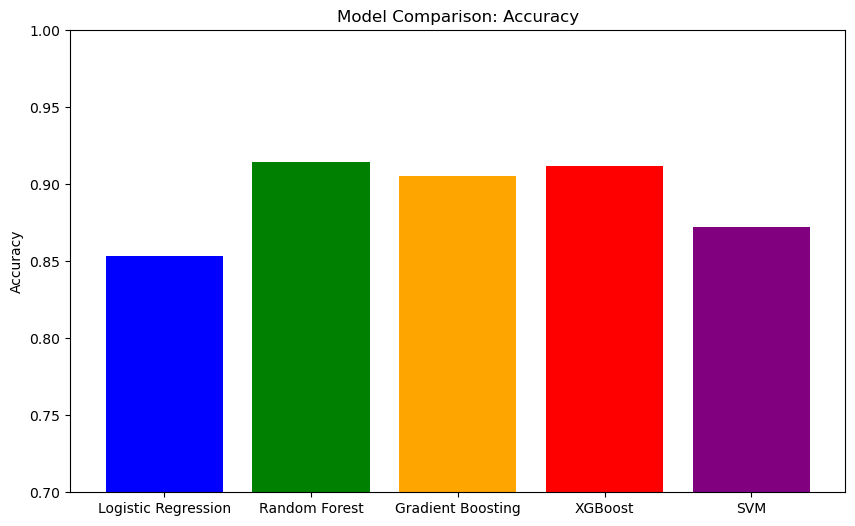

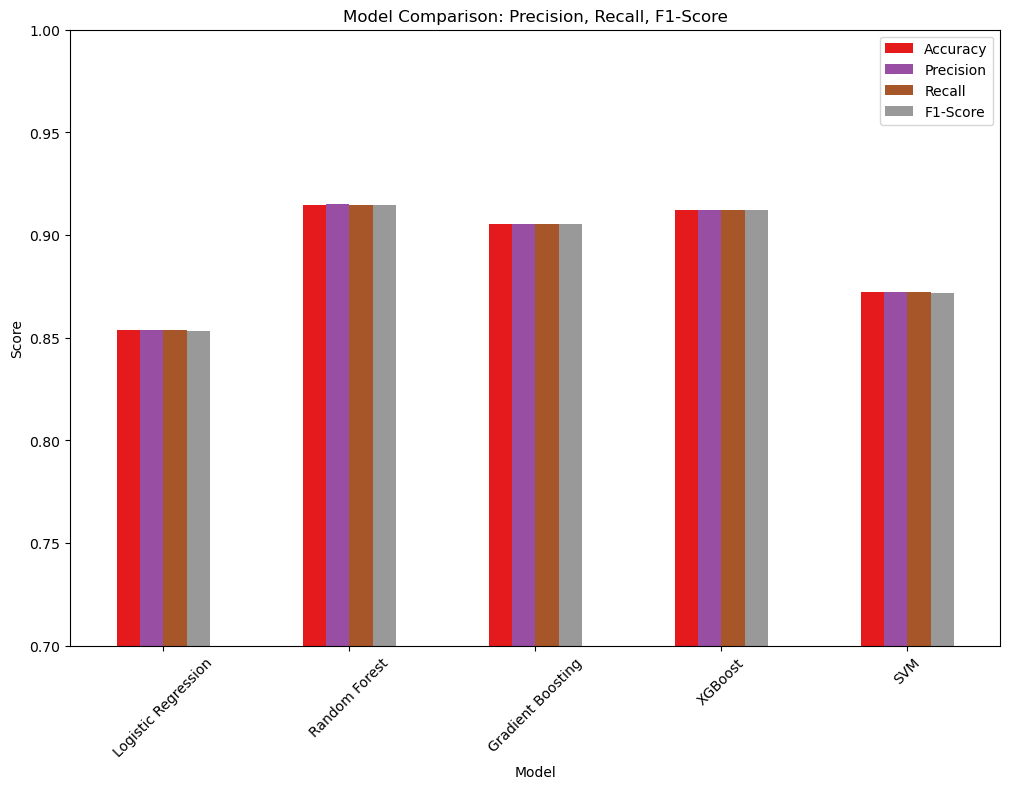

In [29]:
# Make sure you have defined these variables after tuning and model evaluation
log_reg_tuned_accuracy = best_log_reg.score(X_test_scaled, y_test)
y_pred_log_reg_tuned = best_log_reg.predict(X_test_scaled)
logreg_report = classification_report(y_test, y_pred_log_reg_tuned, output_dict=True)

rf_tuned_accuracy = best_rf.score(X_test_scaled, y_test)
y_pred_rf_tuned = best_rf.predict(X_test_scaled)
rf_report = classification_report(y_test, y_pred_rf_tuned, output_dict=True)

gb_tuned_accuracy = best_gb.score(X_test_scaled, y_test)
y_pred_gb_tuned = best_gb.predict(X_test_scaled)
gb_report = classification_report(y_test, y_pred_gb_tuned, output_dict=True)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb_decoded)
xgb_report = classification_report(y_test, y_pred_xgb_decoded, output_dict=True)

svm_accuracy = svm_best_model.score(X_test_scaled, y_test)
y_pred_svm = svm_best_model.predict(X_test_scaled)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)

# Model performance summary
model_performance = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVM'],
    'Accuracy': [log_reg_tuned_accuracy, rf_tuned_accuracy, gb_tuned_accuracy, xgb_accuracy, svm_accuracy],
    'Precision': [
        logreg_report['weighted avg']['precision'],
        rf_report['weighted avg']['precision'],
        gb_report['weighted avg']['precision'],
        xgb_report['weighted avg']['precision'],
        svm_report['weighted avg']['precision']
    ],
    'Recall': [
        logreg_report['weighted avg']['recall'],
        rf_report['weighted avg']['recall'],
        gb_report['weighted avg']['recall'],
        xgb_report['weighted avg']['recall'],
        svm_report['weighted avg']['recall']
    ],
    'F1-Score': [
        logreg_report['weighted avg']['f1-score'],
        rf_report['weighted avg']['f1-score'],
        gb_report['weighted avg']['f1-score'],
        xgb_report['weighted avg']['f1-score'],
        svm_report['weighted avg']['f1-score']
    ]
}

# Convert to DataFrame for better display
performance_df = pd.DataFrame(model_performance)

# Display the performance DataFrame
print(performance_df)

# Plotting the comparison of Accuracy
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Model'], performance_df['Accuracy'], color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.show()

# Plotting Precision, Recall, and F1-Score
performance_df.set_index('Model').plot(kind='bar', figsize=(12, 8), colormap='Set1')
plt.title('Model Comparison: Precision, Recall, F1-Score')
plt.ylabel('Score')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()


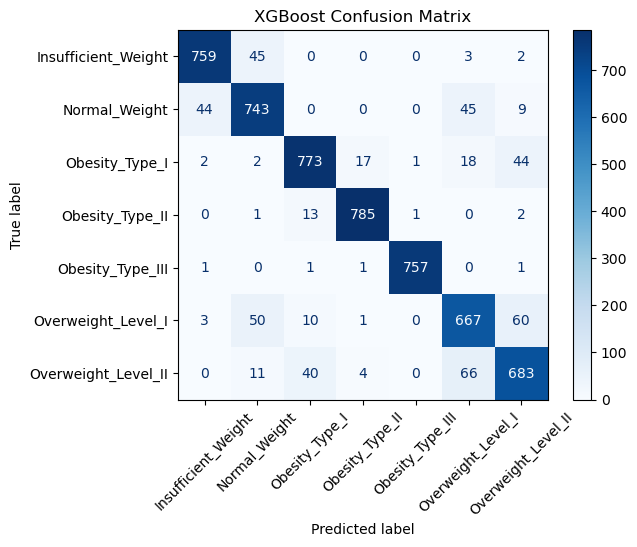

In [44]:
# Similarly, for other models where predictions are already in string format
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb_decoded, cmap='Blues', xticks_rotation=45)
plt.title('XGBoost Confusion Matrix')
plt.show()


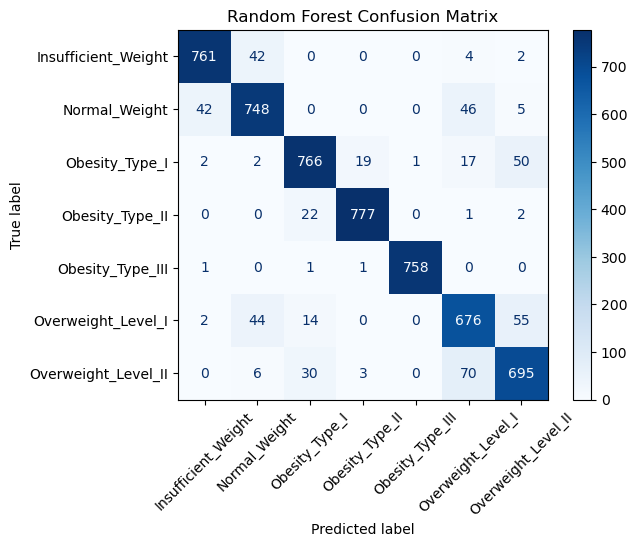

In [43]:
# Predict with Random Forest model
y_pred_rf = best_rf.predict(X_test_scaled)

# Plot the confusion matrix for Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Blues', xticks_rotation=45)
plt.title('Random Forest Confusion Matrix')
plt.show()




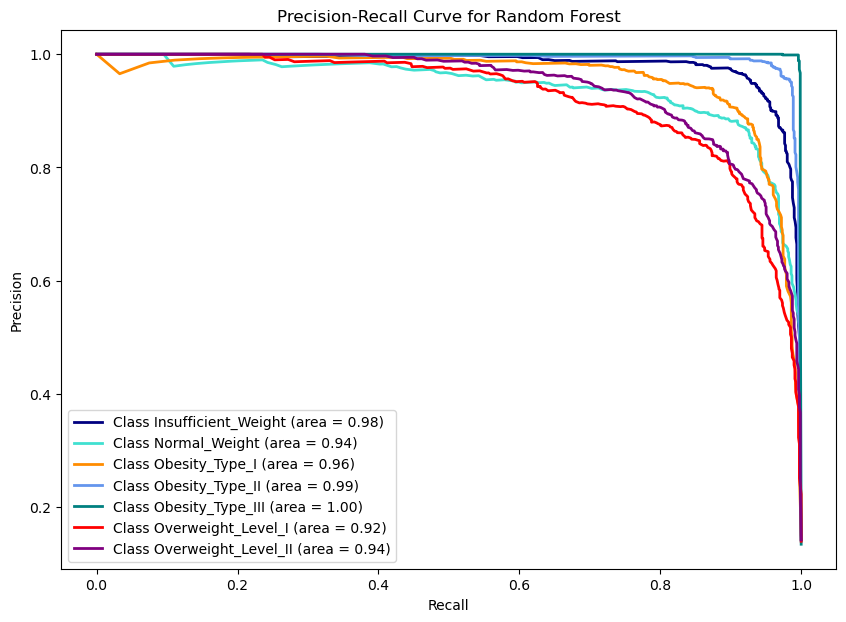

In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the output labels for multi-class precision-recall curve
y_test_binarized = label_binarize(y_test_encoded, classes=[0, 1, 2, 3, 4, 5, 6])

# Generate precision-recall curves for Random Forest
y_pred_rf_prob = best_rf.predict_proba(X_test_scaled)
n_classes = y_test_binarized.shape[1]

# Setup plot details
plt.figure(figsize=(10, 7))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'purple'])

for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_rf_prob[:, i])
    avg_precision = average_precision_score(y_test_binarized[:, i], y_pred_rf_prob[:, i])
    plt.plot(recall, precision, color=color, lw=2, 
             label=f'Class {label_encoder.inverse_transform([i])[0]} (area = {avg_precision:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest")
plt.legend(loc="best")
plt.show()


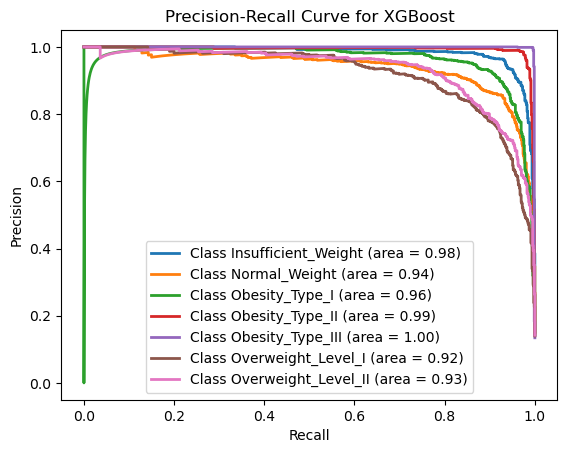

In [47]:
# Precision-Recall curve for XGBoost
y_scores_xgb = xgb_best_model.predict_proba(X_test_scaled)

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_encoded == i, y_scores_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_encoded == i, y_scores_xgb[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {label_encoder.classes_[i]} (area = {average_precision[i]:0.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for XGBoost")
plt.legend(loc="best")
plt.show()


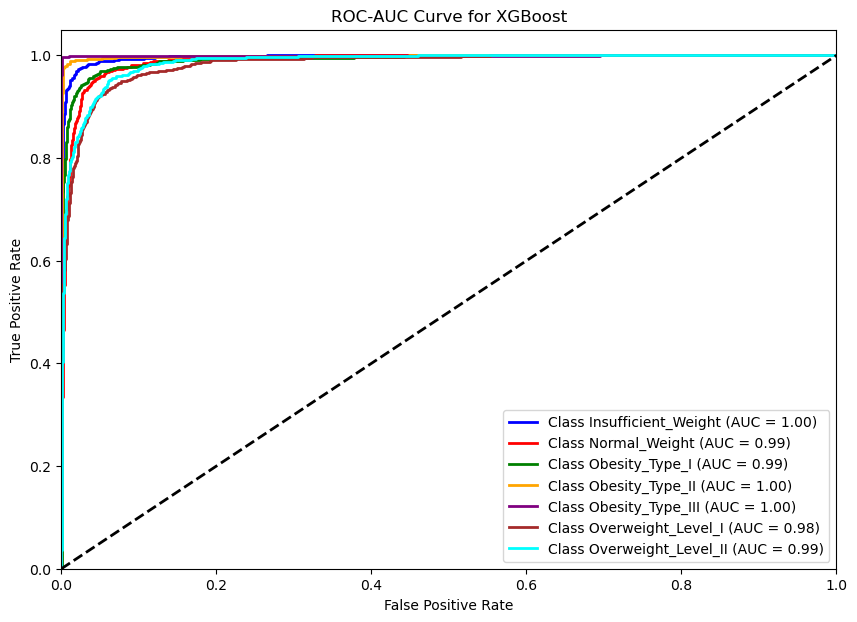

Macro-Averaged AUC: 0.99
Micro-Averaged AUC: 0.99


In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output for ROC-AUC curve (multi-class)
y_test_binarized = label_binarize(y_test_encoded, classes=[0, 1, 2, 3, 4, 5, 6])

# Generate the probabilities for XGBoost (use best model after tuning)
y_pred_xgb_prob = xgb_best_model.predict_proba(X_test_scaled)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_xgb_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 7))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'cyan'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {label_encoder.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

# Optionally, you can calculate the macro and micro AUC scores
macro_roc_auc = roc_auc_score(y_test_binarized, y_pred_xgb_prob, multi_class="ovr", average="macro")
micro_roc_auc = roc_auc_score(y_test_binarized, y_pred_xgb_prob, multi_class="ovr", average="micro")
print(f'Macro-Averaged AUC: {macro_roc_auc:.2f}')
print(f'Micro-Averaged AUC: {micro_roc_auc:.2f}')


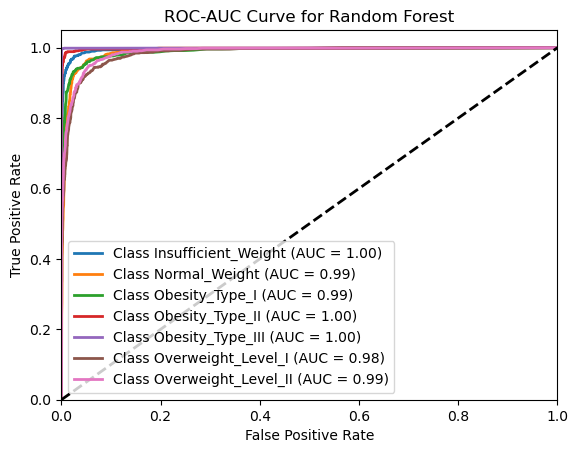

In [48]:
# ROC Curve for Random Forest
y_scores_rf = best_rf.predict_proba(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded, y_scores_rf[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for Random Forest")
plt.legend(loc="best")
plt.show()
